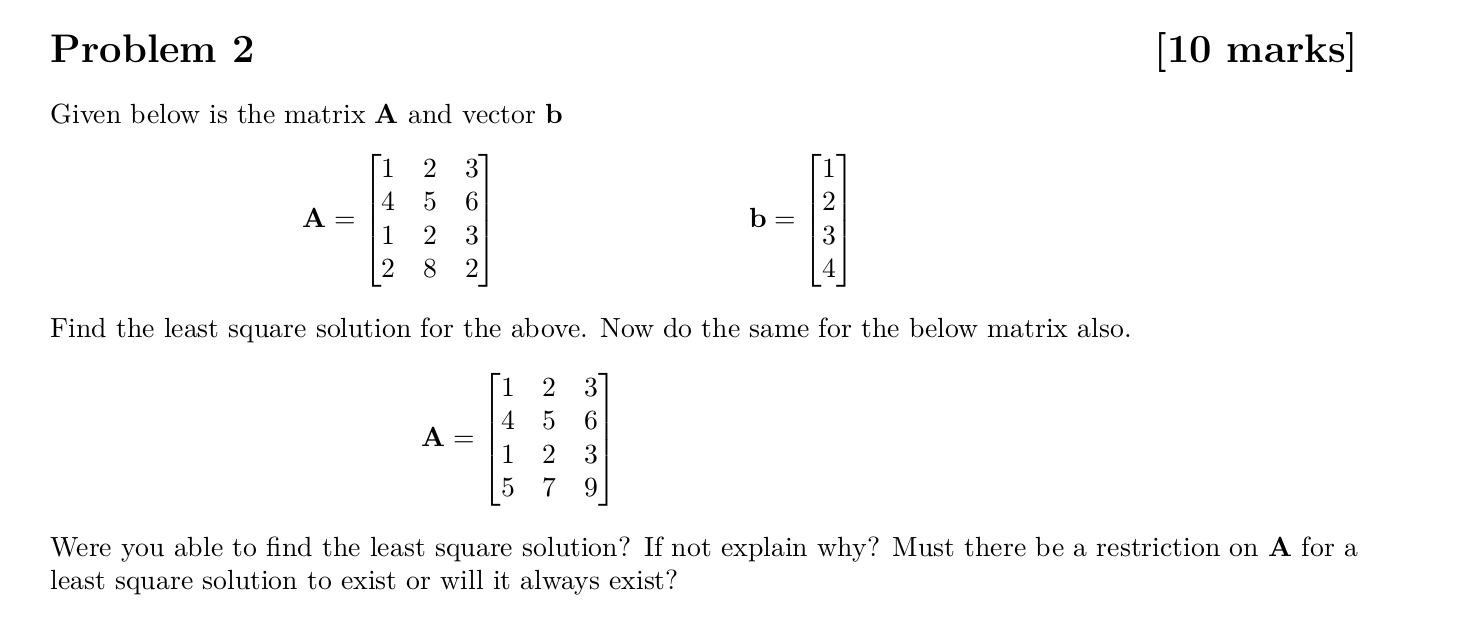

In [3]:
import numpy as np

In [4]:
A1=np.array([[1,2,3],[4,5,6],[1,2,3],[2,8,2]])
b1=np.array([1,2,3,4])

Finding the rank of the matrix using SVD:



In [5]:
def rank_of_matrix(A):
  u,sigma,vT=np.linalg.svd(A)
  return sigma.shape[0]

***Solving for the first matrix A***

From the following we can say that A is full rank matrix.

$A=\begin{vmatrix}
1 &2  &3 \\ 
4 &5  &6 \\ 
1 &2  &3 \\ 
2 &8  &2 
\end{vmatrix}\sim \begin{vmatrix}
1 &2  &3 \\ 
0 &3  &6 \\ 
0 &0  &0 \\ 
0 &-4  &4 
\end{vmatrix}$

For the full rank matrices always least square solution exists.

In [20]:
rank1=rank_of_matrix(A1)
shape_A1=A1.shape
if(rank1==shape_A1[0] or rank1==shape_A1[1]):
  print("Its a Full Rank System. Least squares exist.")

Its a Full Rank System. Least squares exist.


In [21]:
u,sigma,vT=np.linalg.svd(A1.T@A1)
print(u.shape)
print(sigma.shape)
print(vT.shape)

(3, 3)
(3,)
(3, 3)


In [22]:
#solving using the SVD
x=vT.T@np.diag(1/sigma)@u.T@A1.T@b1
print(x)

[-1.33333333  0.66666667  0.66666667]


In [23]:
#solving direct normal equations
np.linalg.inv(A1.T@A1)@A1.T@b1

array([-1.33333333,  0.66666667,  0.66666667])

In [24]:
print("Error using the L2-Norm:",np.linalg.norm(A1@x-b2))

Error using the L2-Norm: 1.4142135623730951


***Solving for the second matrix:***

From the following we can say that A is not full rank matrix.



$A=\begin{vmatrix}
1 &2  &3 \\ 
4 &5  &6 \\ 
1 &2  &3 \\ 
5 &7  &9 
\end{vmatrix}\sim \begin{vmatrix}
1 &2  &3 \\ 
0 &3  &6 \\ 
0 &0  &0 \\ 
0 &3  &6 
\end{vmatrix}\sim \begin{vmatrix}
 1&2  &3 \\ 
 0&3  &6 \\ 
 0&0  &0 \\ 
 0&0  &0 
\end{vmatrix}$

The rank deficiency matrix usually dont have any least-squares solution but, we give the solution as x which gives the $\min_{x}\left \| b-Ax \right \|$

Singular Value Decomposition is method of choice for the rank deficiency least-squares solution .

In [14]:
A2=np.array([[1,2,3],[4,5,6],[1,2,3],[5,7,9]])
b2=np.array([1,2,3,4])

In [15]:
A2.T@A2

array([[ 43,  59,  75],
       [ 59,  82, 105],
       [ 75, 105, 135]])

In [16]:
u,sigma,vT=np.linalg.svd(A2.T@A2)

From the following we can notice that only 2 singular values are only active.

$A_{2}^{T}A_{2}=[u_{1},u_{2}] \begin{bmatrix}
\sigma _{1} &0 \\ 
 0& \sigma _{2} 
\end{bmatrix} [v_{1}^{T},v_{2}^{T}]$

In [17]:
u[0:3,0:2]@np.diag(sigma)[0:2,0:2]@vT[0:2,0:3]

array([[ 43.,  59.,  75.],
       [ 59.,  82., 105.],
       [ 75., 105., 135.]])

Since, the rank of $A_{2}$ is only two. 
While calculating the least-squares solution for A2 we use only $[u_{1},u_{2}] ,\begin{bmatrix}
\sigma _{1} &0 \\ 
 0& \sigma _{2} 
\end{bmatrix} ,[v_{1}^{T},v_{2}^{T}]$ of the $A_{2}^{T}A_{2}$ .

$[u_{1},u_{2}] \begin{bmatrix}
\sigma _{1} &0 \\ 
 0& \sigma _{2} 
\end{bmatrix} [v_{1}^{T},v_{2}^{T}]$x=$A_{2}^{T}b$

$x=(\sigma _{1}u_{1}v_{1}^{T}+\sigma _{2}u_{2}v_{2}^{T})^{-1}A_{2}^{T}b$

In [18]:
x=vT.T[0:3,0:2]@np.diag(1/sigma)[0:2,0:2]@u.T[0:2,0:3]@A2.T@b2
print(x)
print("Error using the L2-Norm:",np.linalg.norm(A2@x-b2))

[-1.0000000e+00 -4.4408921e-16  1.0000000e+00]
Error using the L2-Norm: 1.4142135623730951
